<h1> Exploratory Data Analysis </h1>
<h2> By : Vivek Joshi </h2>

Objective : Perform EDA over a dataset named 'SampleSuperstore' and find out useful insights to strengthen the weak areas.

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv(r"C:\Users\HP\Desktop\ML-Projects2021\Datasets\retail.csv")

#data is imported
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [39]:
data.shape
#checking the dimension of the given data
#rows-cols

(9994, 13)

In [40]:
#checking for null/nan calues

data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [41]:
#taking a brief idea of statistical summary
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [42]:
#we need to remove duplicate entry to make it more accurate
#finding no of duplicate items in data
data.duplicated().sum()


17

In [43]:
#lets remove these 17 duplicates
data.drop_duplicates(keep = 'first', inplace = True, subset = None)

In [44]:
#verify if any duplicate are still inthe data
data.duplicated().sum()

0

In [45]:
#lets find new dimensions of data
data.shape

(9977, 13)

#visualization
A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

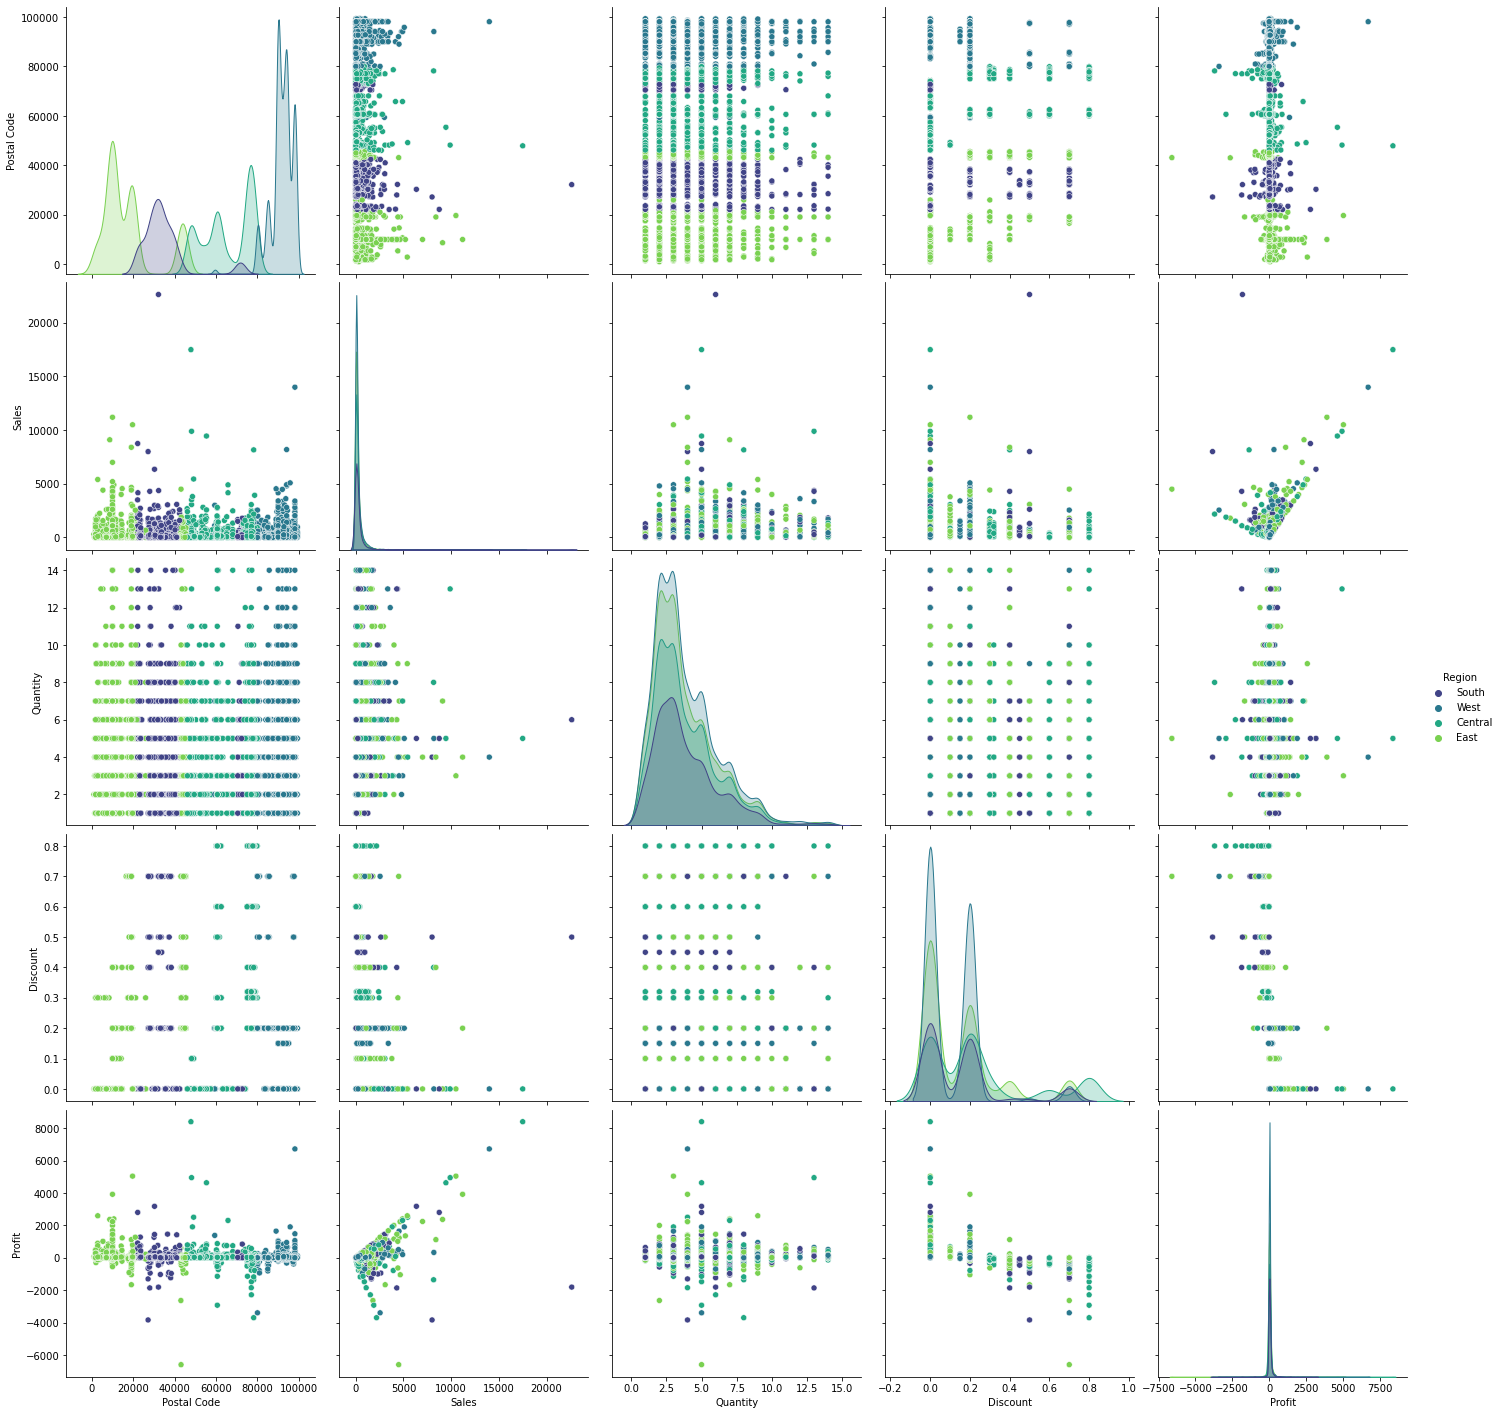

In [46]:
sns.pairplot(data, hue ='Region', palette= 'viridis', height = 4 )
plt.show()

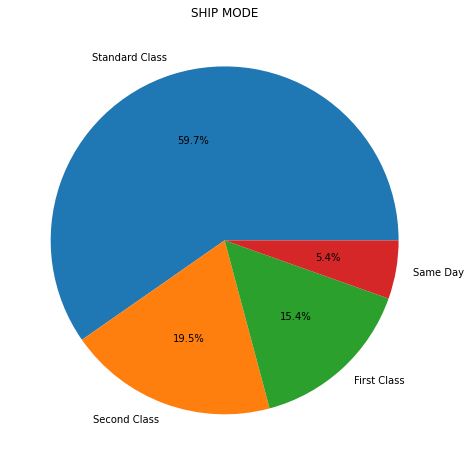

In [47]:
plt.figure(figsize= (8,8))
plt.title('SHIP MODE')
plt.pie(data['Ship Mode'].value_counts(), labels=data['Ship Mode'].value_counts().index, autopct = '%2.1f%%')
plt.show()

Here we can observe that SAME DAY is the least used ship mode and STANDARD CLASS is most frequent ship mode.

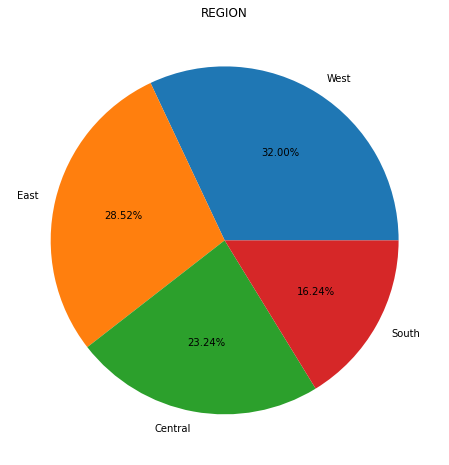

In [48]:
plt.figure(figsize= (8,8))
plt.title('REGION')
plt.pie(data['Region'].value_counts(), labels= data['Region'].value_counts().index, autopct= '%2.2f%%')
plt.show()

Here we can observe which region have how much % of sales.
Clearly West region have highest % of sales and South region have least % of sales.

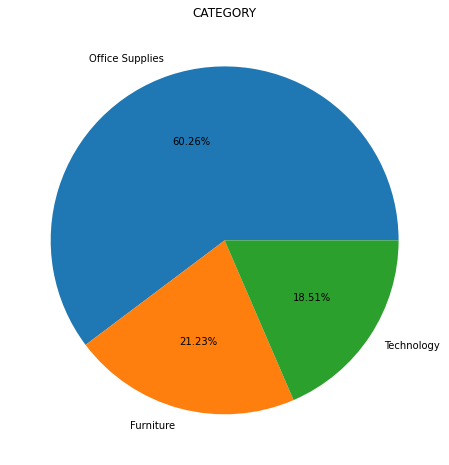

In [49]:
plt.figure(figsize= (8,8))
plt.title('CATEGORY')
plt.pie(data['Category'].value_counts(), labels= data['Category'].value_counts().index, autopct= '%2.2f%%')
plt.show()

Office products contributes more than 60% of total sales.

In [50]:
#lets plot a countplot for sub-category and compare it with the Region of sales.

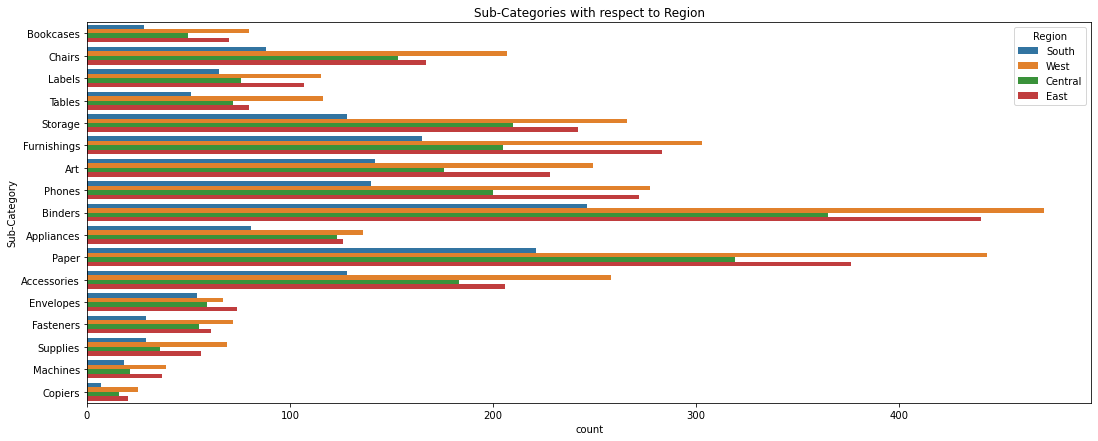

In [51]:
plt.figure(figsize = (18,7))
plt.title('Sub-Categories with respect to Region')
sns.countplot(y=data['Sub-Category'], hue=data['Region'], palette='tab10')
plt.show()

We can observe that Copiers are the least sold and Binders are the most sold sub-category.

<h1> Lets analyse it state wise </h1>

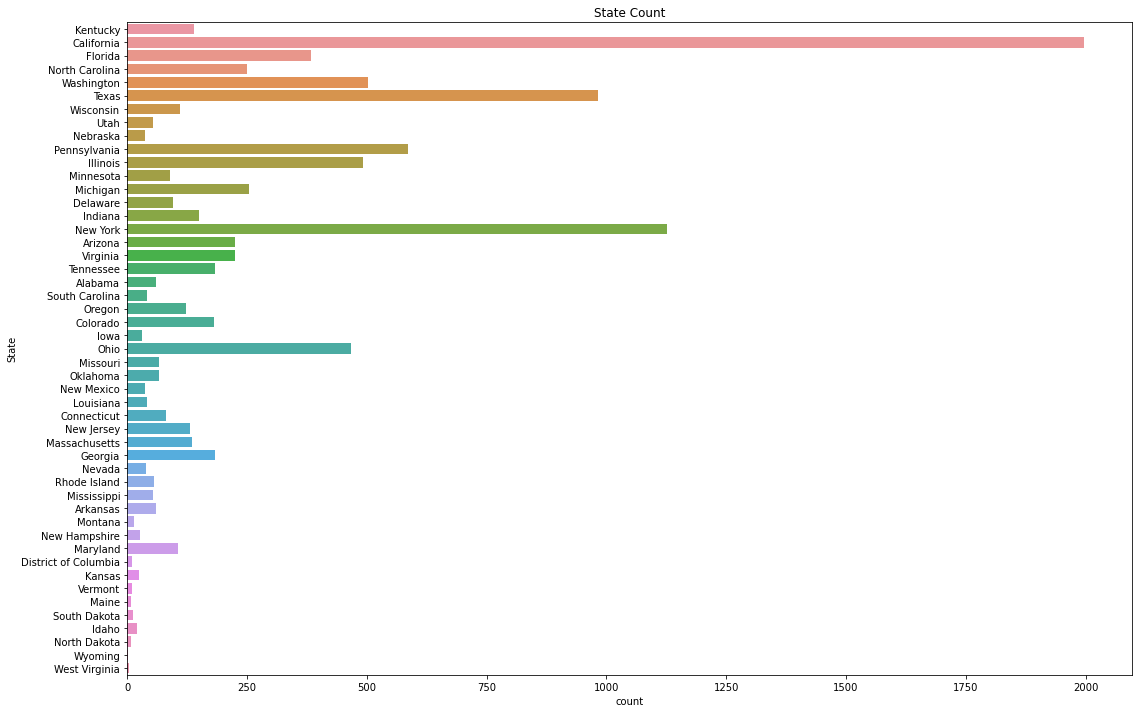

In [52]:
plt.figure(figsize=(18,12))
sns.countplot(y=data["State"])
plt.title("State Count")
plt.show()

Clearly most of the sales are form California

In [53]:
data['Frequency']= data.groupby('City')['City'].transform('count')
data1 = data.sort_values('Frequency', ascending= False).groupby('City').head(15)
data1 = data1[['City', 'Frequency']]
data1.head(10)

,City,Frequency
3322,New York City,914
2295,New York City,914
2153,New York City,914
2149,New York City,914
6127,New York City,914
8904,New York City,914
2138,New York City,914
8905,New York City,914
8906,New York City,914
2132,New York City,914


There are lots of duplicates in our data. Lets try to drop all duplicates.

In [54]:
data1.duplicated().sum()

3215

In [55]:
data1.drop_duplicates(subset=None, keep='first', inplace = True)
data1.duplicated().sum()

0

We have removed all duplicates form our data.

In [56]:
#resetting the indices of this dataframe
data1.reset_index(drop=True)

,City,Frequency
0,New York City,914
1,Los Angeles,746
2,Philadelphia,536
3,San Francisco,506
4,Seattle,424
...,...,...
526,Tinley Park,1
527,Aberdeen,1
528,Pensacola,1
529,Whittier,1


Lets use heatmap form seaborn to look which attribute is highly corelated with which one.

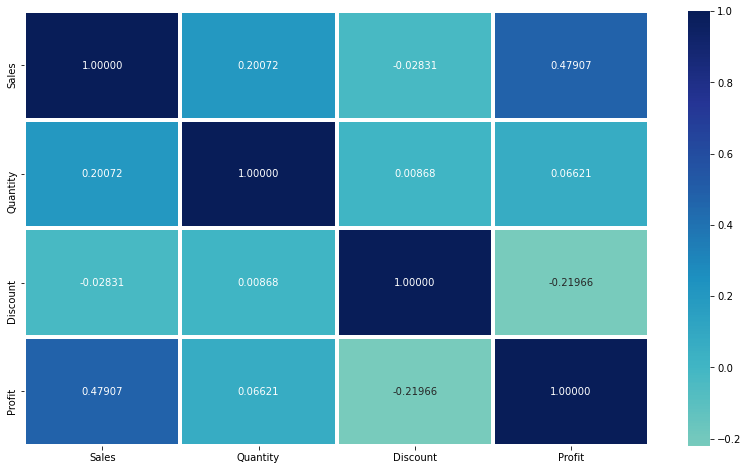

In [57]:
lis_data=['Sales', 'Quantity', 'Discount', 'Profit']
plt.figure(figsize=(14,8))
sns.heatmap(data[lis_data].corr(), cmap = 'YlGnBu', linewidth = 3, annot = True, fmt = '.5f', center = 0);

We can conclude that sales and profit have high positive corelation.
Profit and Discount have negative corelation.
Quantity and Discount have almost no correlation.

<h1>Conclusion</h1>

1> Business is most successful in New York City.

2> Business should focus more on increasing sales in the Southern Region.

3> People opting for same-day deliveries are less probably due to higher shiping charges.

4> Business in West Virginia and Wyoming is very low.